## CSCI322 Project
## Early Stage Detection of Autism Spectrum Disorders

### Table of Contents
<a href="#intro">1. Introduction</a><br>
<a href="#wrangling">2. Data Wrangling</a><br>
<a href="#eda">3. Exploratory Data Analysis</a><br>
<a href="#calgo">4. Clustering Algorithms </a><br>
<a href="#conclusion">5. Conclusions</a>

<a id='intro'></a>
## 1. Introduction
### Overview
This dataset contains information 1054 cases about Autism Spectrum Disorder(ASD). The columns include 10 yes or no questions, gender, ethnicity, jaundice, family member with ASD ...etc.

The data detrmines whether the child has ASD traits or not by asking the care provider 10 yes or no questions (cols A1 to A10).
The columns A1 to A10 answers the following questions:
<img src="questions.png"/>

### Questions
<a href="#q1">1. What is the age range of males and females?</a><br>
<a href="#q2">2. What is the percentage of toddlers with ASD in the dataset? </a><br>
<a href="#q3">3. What is the gender ratio of toddlers with ASD? </a><br>
<a href="#q4">4. What is the distribution of QScore? </a><br>
<a href="#q5">5. What is the relation between QScore and toddler's age (in months)?  </a><br>
<a href="#q6">6. What is the ethnicity distribution of toddlers ASD traits?  </a><br>
<a href="#q7">7. What is the percentage of females and males that have ASD Traits in the middle east? </a><br>
<a href="#q8">8. How strong is the relation between having jaundice and having ASD traits? </a><br>
<a href="#q9">9. What are the characteristics of males and females that have a family member with ASD?</a><br>
<a href="#q10">10. Does having a family member with ASD indicate that the toddler has ASD Traits?</a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

<a id='wrangling'></a>
## 2. Data Wrangling

### 2.1 Loading data

In [2]:
file_name = "Toddler Autism dataset July 2018.csv"
df = pd.read_csv(file_name)
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [3]:
df.shape

(1054, 19)

### 2.2 Data Assessment

In [4]:
# Check for missing or null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [5]:
# check for duplicates in the data
df.iloc[:,1:].duplicated().sum()

79

In [6]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


### 2.3 Data cleaning

In [7]:
# Make a copy of the data
df_clean = df.copy()

In [8]:
# Drop 'case_no' col
df_clean.drop('Case_No', inplace=True, axis=1)

In [9]:
# Drop duplicates in data
df_clean.drop_duplicates(inplace = True)

In [10]:
# Drop 'Who completed the test' col
df_clean.drop('Who completed the test', inplace=True, axis=1)

In [11]:
df_clean.rename(columns={'Class/ASD Traits ': 'ASD', 'Qchat-10-Score': 'QScore'}, inplace=True)
df_clean.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,QScore,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,ASD
0,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,No
1,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,Yes


In [12]:
#Label encoding for ASD, Sex, Jaundice, and Family_mem_with_ASD columns
label_encoder = preprocessing.LabelEncoder()
df_clean['ASD'] = label_encoder.fit_transform(df_clean['ASD'])
df_clean['Sex'] = label_encoder.fit_transform(df_clean['Sex'])
df_clean['Jaundice'] = label_encoder.fit_transform(df_clean['Jaundice'])
df_clean['Family_mem_with_ASD'] = label_encoder.fit_transform(df_clean['Family_mem_with_ASD'])

In [13]:
df_clean.shape

(975, 17)

<a id='eda'></a>
## 3. Exploratory Data Analysis

<a id='q1'></a>
### 3.1 Question 1 ( What is the age range of males and females?)

In [14]:
np.sort(df_clean.Age_Mons.unique())

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36], dtype=int64)

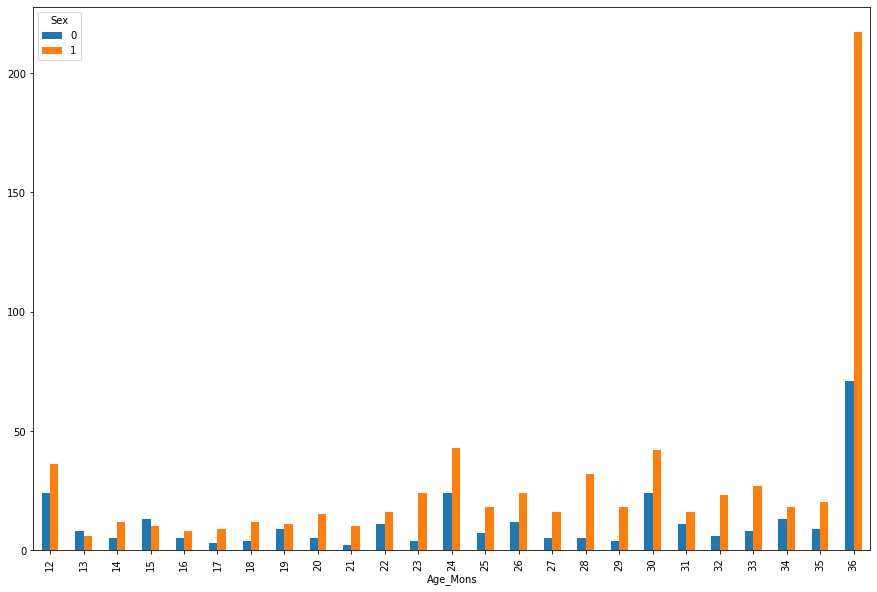

In [15]:
df_clean.groupby(['Age_Mons','Sex']).Age_Mons.count().unstack().plot(kind='bar',figsize=(15, 10));

Age range (of males and females) is from 12 months (1 year) to 36 months (3 years).

<a id='q2'></a>
### 3.2 Question 2 (What is the percentage of toddlers with ASD in the dataset? )

<AxesSubplot:xlabel='ASD', ylabel='count'>

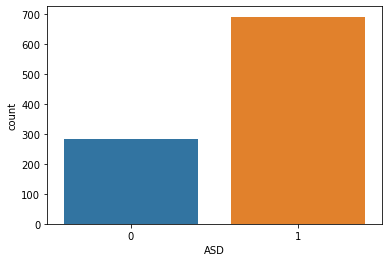

In [16]:
sb.countplot(data = df_clean, x ='ASD')

In [17]:
print("Percentage of toddlers with ASD is = ",(((df_clean['ASD']==1).sum())/len(df_clean))*100,"%")

Percentage of toddlers with ASD is =  70.87179487179486 %


<a id='q3'></a>
### 3.3 Question 3 ( What is the gender ratio of toddlers with ASD?)

<AxesSubplot:xlabel='Sex', ylabel='count'>

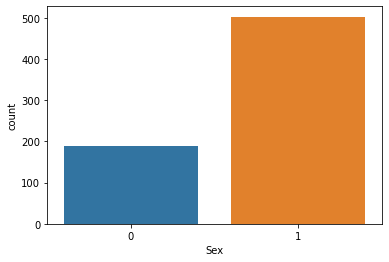

In [18]:
#gender distribution of toddlers with ASD traits
sb.countplot(data = df_clean[df_clean['ASD'] == 1], x ='Sex')

In [19]:
ASD=df_clean[df_clean['ASD']==1]
MalesWithASD=ASD[ASD['Sex']==1]
FemalesWithASD=ASD[ASD['Sex']==0]
print("Percentage of males with ASD relative to all toddlers with ASD is = " ,len(MalesWithASD)/len(ASD)*100,"%")
print("Percentage of females with ASD relative to all toddlers with ASD is = " ,len(FemalesWithASD)/len(ASD)*100,"%")

Percentage of males with ASD relative to all toddlers with ASD is =  72.7930535455861 %
Percentage of females with ASD relative to all toddlers with ASD is =  27.206946454413895 %


Therefore, we can conclude from the graph that ASD is more common in males than in females.

<a id='q4'></a>
### 3.4 Question 4 ( What is the distribution of QScore?)

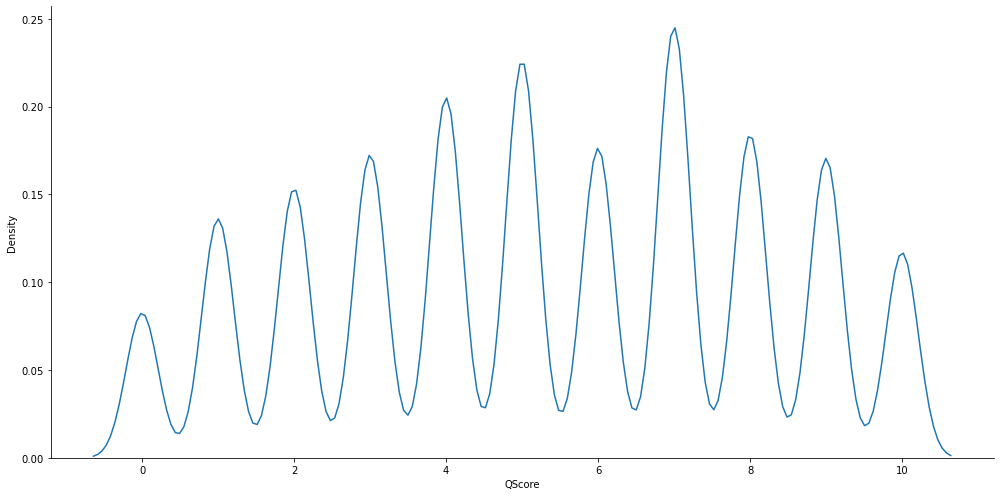

In [20]:
sb.displot(x=df_clean["QScore"],kind="kde",bw_adjust=0.3,height=7, aspect=16/8)

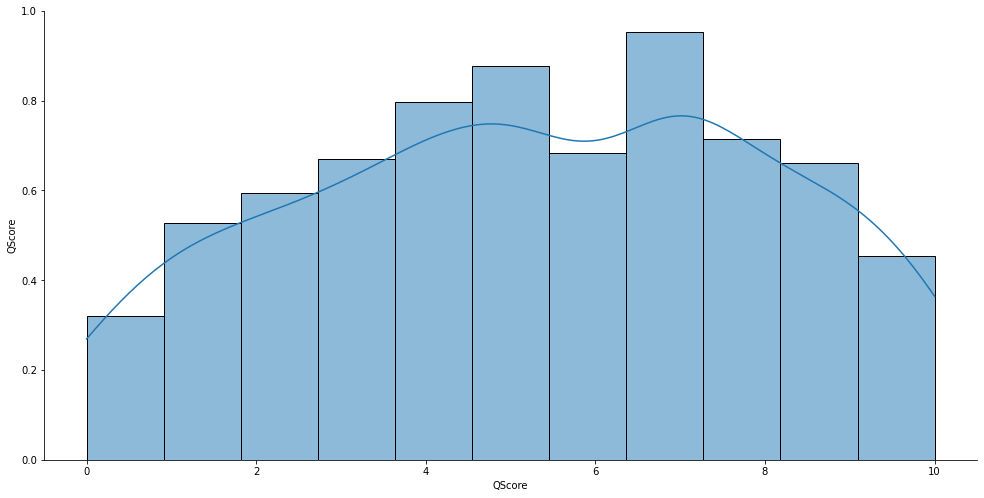

In [21]:
g = sb.PairGrid(df_clean.iloc[0:,[11]],height=7, aspect=16/8)
g.map_upper(sb.histplot)
g.map_lower(sb.kdeplot, fill=True)
g.map_diag(sb.histplot, kde=True)

In [22]:
Cat=df_clean.iloc[0:,[10,11,13,16]]
Cat

,Age_Mons,QScore,Ethnicity,ASD
0,28,3,middle eastern,0
1,36,4,White European,1
2,36,4,middle eastern,1
3,24,10,Hispanic,1
4,20,9,White European,1
...,...,...,...,...
1049,24,1,White European,0
1050,12,5,black,1
1051,18,9,middle eastern,1
1052,19,3,White European,0


In [23]:
import plotly.express as px
import plotly.graph_objects as go

from jupyter_dash import JupyterDash
import dash_core_components as dcc #The dash_core_components library generates higher-level components like controls and graphs.
import dash_html_components as html #The dash_html_components library provides classes for all of the HTML tags
from dash.dependencies import Input, Output

<ipython-input-23-4382b6dc0fdb>:5: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc #The dash_core_components library generates higher-level components like controls and graphs.
<ipython-input-23-4382b6dc0fdb>:6: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html #The dash_html_components library provides classes for all of the HTML tags


In [24]:
# Build App
app1 = JupyterDash(__name__)



app1.layout = html.Div(
    [
    html.H1("QScore_Stats",
),
    dcc.Graph(id='graph',

              ),
    html.Label([
             dcc.Dropdown(id='column-dropdown',
                     ## list of values
                    options=[{'label': c, 'value': c} for c in Cat],    
                     ## initial value
                    value = df_clean['QScore'])
        ]),
])

app1.run_server(mode='inline',port=8090) #external

In [25]:
@app1.callback(
    Output(component_id='graph', component_property='figure'),
    [Input(component_id="column-dropdown", component_property="value")] )
def update_figure(column):
    
    return px.histogram(

df_clean, 
x=column, 
y=df_clean["QScore"]
        ,
title="stats"
    )
# Run app and display result inline in the notebook
app1.run_server(mode="inline",port=8870)

<a id='q5'></a>
### 3.5 Question 5 (What is the relation between QScore and toddler's age (in months)?)

### Most common types of ages:

In [26]:
age = df[['Age_Mons']]

TopAges = (age.groupby('Age_Mons').size().sort_values(ascending=False).rename('counts').reset_index())

TopAges.head(11)


,Age_Mons,counts
0,36,320
1,24,70
2,12,67
3,30,67
4,28,42
5,26,36
6,33,36
7,34,34
8,15,31
9,35,30


### Most common types of Qchat-10-Score:

In [27]:
Score = df_clean[['QScore']]

TopScors = (Score.groupby('QScore').size().sort_values(ascending=False).rename('counts').reset_index())

TopScors.head(11)

,QScore,counts
0,7,128
1,5,118
2,4,107
3,8,96
4,6,92
5,3,90
6,9,89
7,2,80
8,1,71
9,10,61


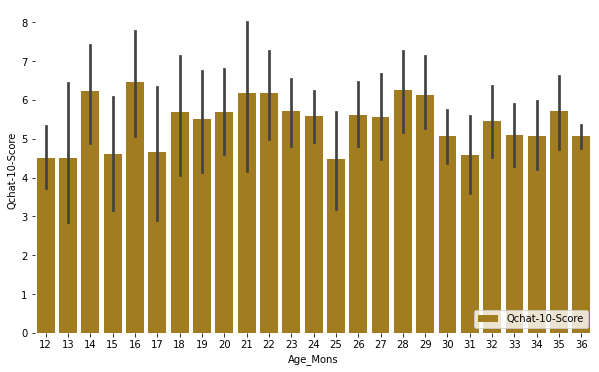

In [28]:
f, ax = plt.subplots(figsize=(10, 6))
sb.set_color_codes("dark")
sb.barplot(x="Age_Mons", y="QScore", data=df_clean,
            label="Qchat-10-Score", color="y")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Qchat-10-Score",
       xlabel="Age_Mons")
sb.despine(left=True, bottom=True)

plt.show()

<AxesSubplot:xlabel='Age_Mons', ylabel='QScore'>

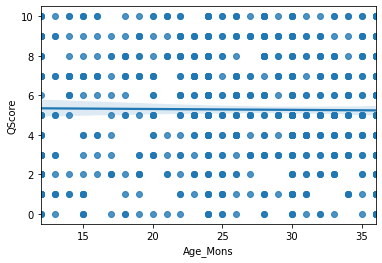

In [29]:
sb.regplot(x="Age_Mons", y="QScore", data=df_clean)

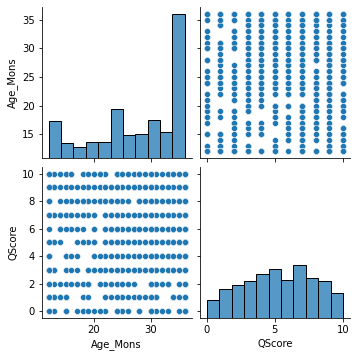

In [30]:
sb.pairplot(df_clean[['Age_Mons','QScore']])

          Age_Mons    QScore
Age_Mons  1.000000 -0.012137
QScore   -0.012137  1.000000


<AxesSubplot:>

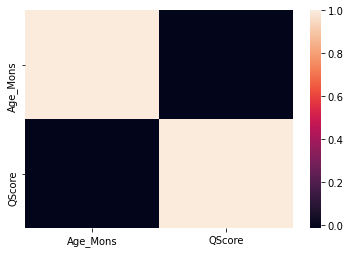

In [31]:
print(df_clean[['Age_Mons','QScore']].corr())
sb.heatmap(df_clean[['Age_Mons','QScore']].corr())

Since it is black so it has very low correlation. No linear relationship exists.

<a id='q6'></a>
### 3.6 Question 6 (What is the ethnicity distribution of toddler's ASD traits?)

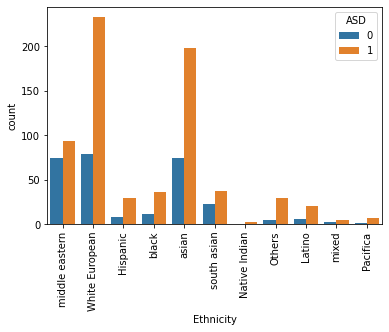

In [32]:
ax = sb.countplot(data = df_clean, x ='Ethnicity', hue='ASD')
ax.tick_params(axis='x', rotation=90)

ASD  Ethnicity     
1    Hispanic           29
     Latino             20
     Native Indian       3
     Others             29
     Pacifica            7
     White European    233
     asian             198
     black              36
     middle eastern     94
     mixed               5
     south asian        37
Name: Ethnicity, dtype: int64


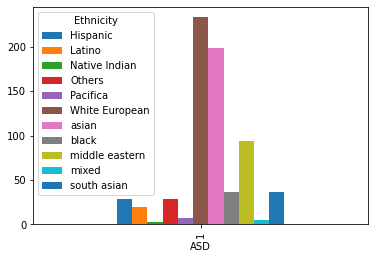

In [33]:
asd=df_clean[df_clean["ASD"]==1]
asd=asd.groupby(["ASD",'Ethnicity']).Ethnicity.count()
print(asd)
asd.unstack().plot(kind="bar");

The ethnicity distribution graph reveals that "white european" and "asain" are the ethnicities with most toddlers with ASD in our dataset. 

<a id='q7'></a>
### 3.7 Question 7 (What is the percentage of females and males that have ASD Traits in the middle east?)

In [34]:
df_clean["Sex"].value_counts()

1    683
0    292
Name: Sex, dtype: int64

In [35]:
df_clean["Ethnicity"].value_counts()

White European    312
asian             272
middle eastern    168
south asian        60
black              48
Hispanic           37
Others             34
Latino             26
Pacifica            8
mixed               7
Native Indian       3
Name: Ethnicity, dtype: int64

In [36]:
df_clean["ASD"].value_counts()

1    691
0    284
Name: ASD, dtype: int64

In [37]:
middle_eastern_females=df_clean[df_clean.Sex==0].Ethnicity=="middle eastern"
middle_eastern_females.value_counts()

False    228
True      64
Name: Ethnicity, dtype: int64

In [38]:
middle_eastern_males=df_clean[df_clean.Sex==1].Ethnicity=="middle eastern"
middle_eastern_males.value_counts()

False    579
True     104
Name: Ethnicity, dtype: int64

So, the sum of females and males in the middle east equals 64+104 = 168

In [39]:
middle_eastern_females.loc[df_clean["ASD"]==1].value_counts()

False    157
True      31
Name: Ethnicity, dtype: int64

In [40]:
#Therfore the percentage of females in Middle eastern with ASD is:
PFMA=(31/168)
print("Percentage of females in the middle east with ASD is: ",PFMA*100,"%")

Percentage of females in the middle east with ASD is:  18.452380952380953 %


In [41]:
middle_eastern_males.loc[df_clean["ASD"]==1].value_counts()

False    440
True      63
Name: Ethnicity, dtype: int64

In [42]:
#Therfore the percentage of Males in Middle eastern with ASD is:
PMMA=(63/168)
print("Percentage of males in the middle east with ASD is: ",PMMA*100,"%")

Percentage of males in the middle east with ASD is:  37.5 %


We can conclude here from the dataset that males in the middle east with ASD traits are more than females with ASD traits in the midlle east as the percentage of males is 37.5% and the percentage of females is 18.45%

<a id='q8'></a>
### 3.8 Question 8 (How strong is the relation between having jaundice and having ASD traits?)

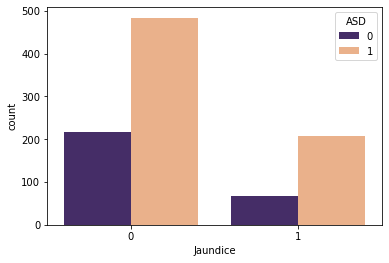

In [43]:
fig = sb.countplot(data = df_clean, x = 'Jaundice', hue = 'ASD', palette=['#432371',"#FAAE7B"])

Most of the cases with ASD traits did not have jaundice. Hence, the graph above indicates that having jaundice is not related to having ASD traits.

<a id='q9'></a>
### 3.9 Question 9 (What are the characteristics of males and females that have a family member with ASD?)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

75.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

34.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



<AxesSubplot:xlabel='Family_mem_with_ASD', ylabel='Ethnicity'>

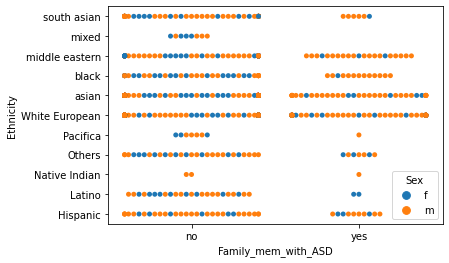

In [44]:
sb.swarmplot(data=df, y='Ethnicity', x='Family_mem_with_ASD', hue ='Sex' )

<AxesSubplot:xlabel='count', ylabel='Jaundice'>

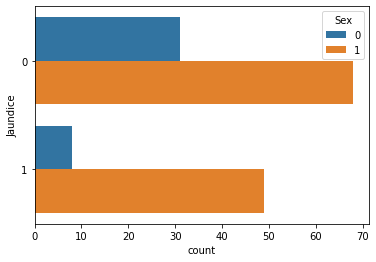

In [45]:
sb.countplot(data=df_clean[(df_clean['Family_mem_with_ASD']==1)], y='Jaundice', hue='Sex')

In [46]:
A1_A10 = df_clean[df_clean['Family_mem_with_ASD']==1].iloc[:,0:10]
A1_A10.apply(pd.value_counts)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,60,80,88,81,76,58,55,89,80,62
1,96,76,68,75,80,98,101,67,76,94


<a id='q10'></a>
### 3.10 Question 10 (Does having a family member with ASD indicate that the toddler has ASD Traits?)

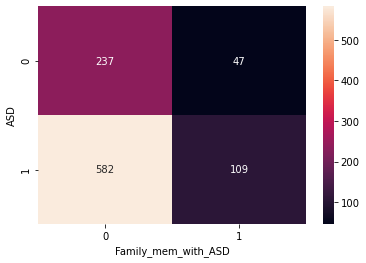

In [47]:
sb.heatmap(pd.crosstab(df_clean.ASD, df_clean.Family_mem_with_ASD), annot=True, fmt='d');

From the heatmap above, we can say that having a family member with ASD does not mean that the toddler will have ASD traits. The majority of the data show that the toddlers might have ASD traits even when there is not family member with ASD.

<a id='calgo'></a>
## 4. Clustering Algorithms

In [48]:
#One-hot encoding for Ethnicity column
one_hot = pd.get_dummies(df_clean['Ethnicity'])
one_hot

,Hispanic,Latino,Native Indian,Others,Pacifica,White European,asian,black,middle eastern,mixed,south asian
0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,1,0,0,0,0,0
1050,0,0,0,0,0,0,0,1,0,0,0
1051,0,0,0,0,0,0,0,0,1,0,0
1052,0,0,0,0,0,1,0,0,0,0,0


In [49]:
# Join the encoded df
merged_df = pd.merge(df_clean, one_hot, left_index=True, right_index=True)
# Drop column Ethnicity as it is now encoded
merged_df.drop('Ethnicity', inplace=True, axis = 1)
merged_df.drop('QScore', inplace=True, axis = 1)
merged_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Latino,Native Indian,Others,Pacifica,White European,asian,black,middle eastern,mixed,south asian
0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0



### 4.1 Random Forest Classifer

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [51]:
X = merged_df.drop('ASD', axis=1)
y = merged_df['ASD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=66)

print("X shape: ", X.shape)
print("y shape: ", y.shape)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X shape:  (975, 25)
y shape:  (975,)
X_train shape:  (682, 25)
y_train shape:  (682,)
X_test shape:  (293, 25)
y_test shape:  (293,)


In [52]:
clf = RandomForestClassifier(n_estimators = 10) 

clf.fit(X_train, y_train)

rfc_predict = clf.predict(X_test)

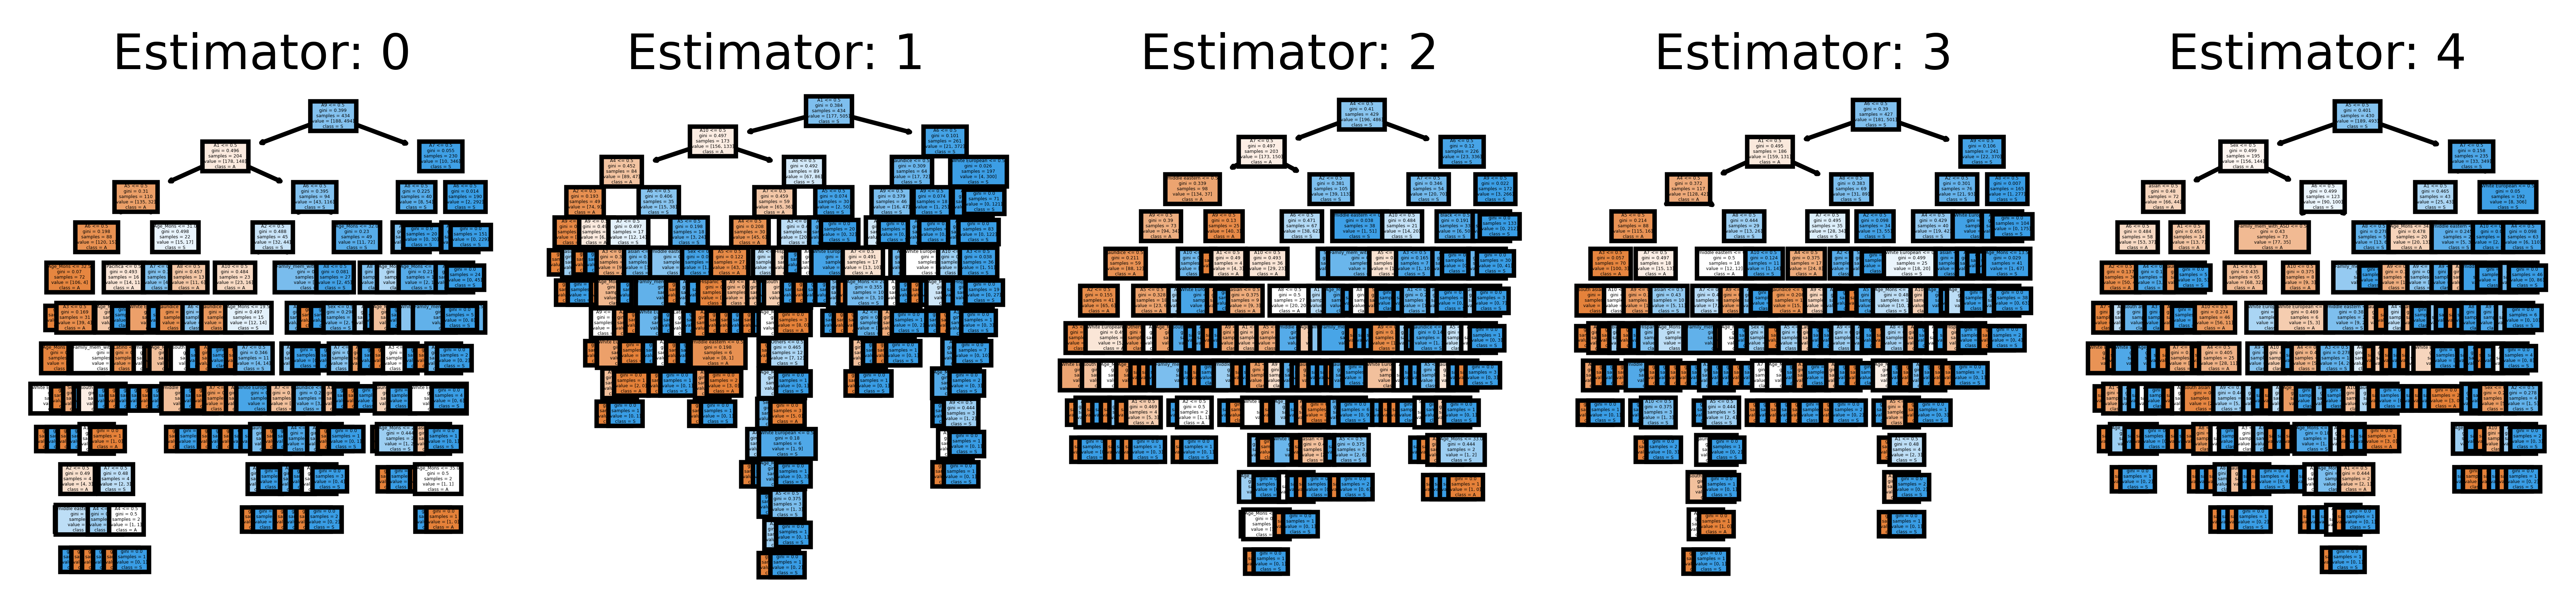

In [53]:
fn= X.columns
cn= y.name

fig, axes = plt.subplots(nrows = 1, ncols = 5,figsize = (10,2), dpi=900)

for index in range(0, 5):
    tree.plot_tree(clf.estimators_[index],
                   feature_names = fn, 
                   class_names= cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

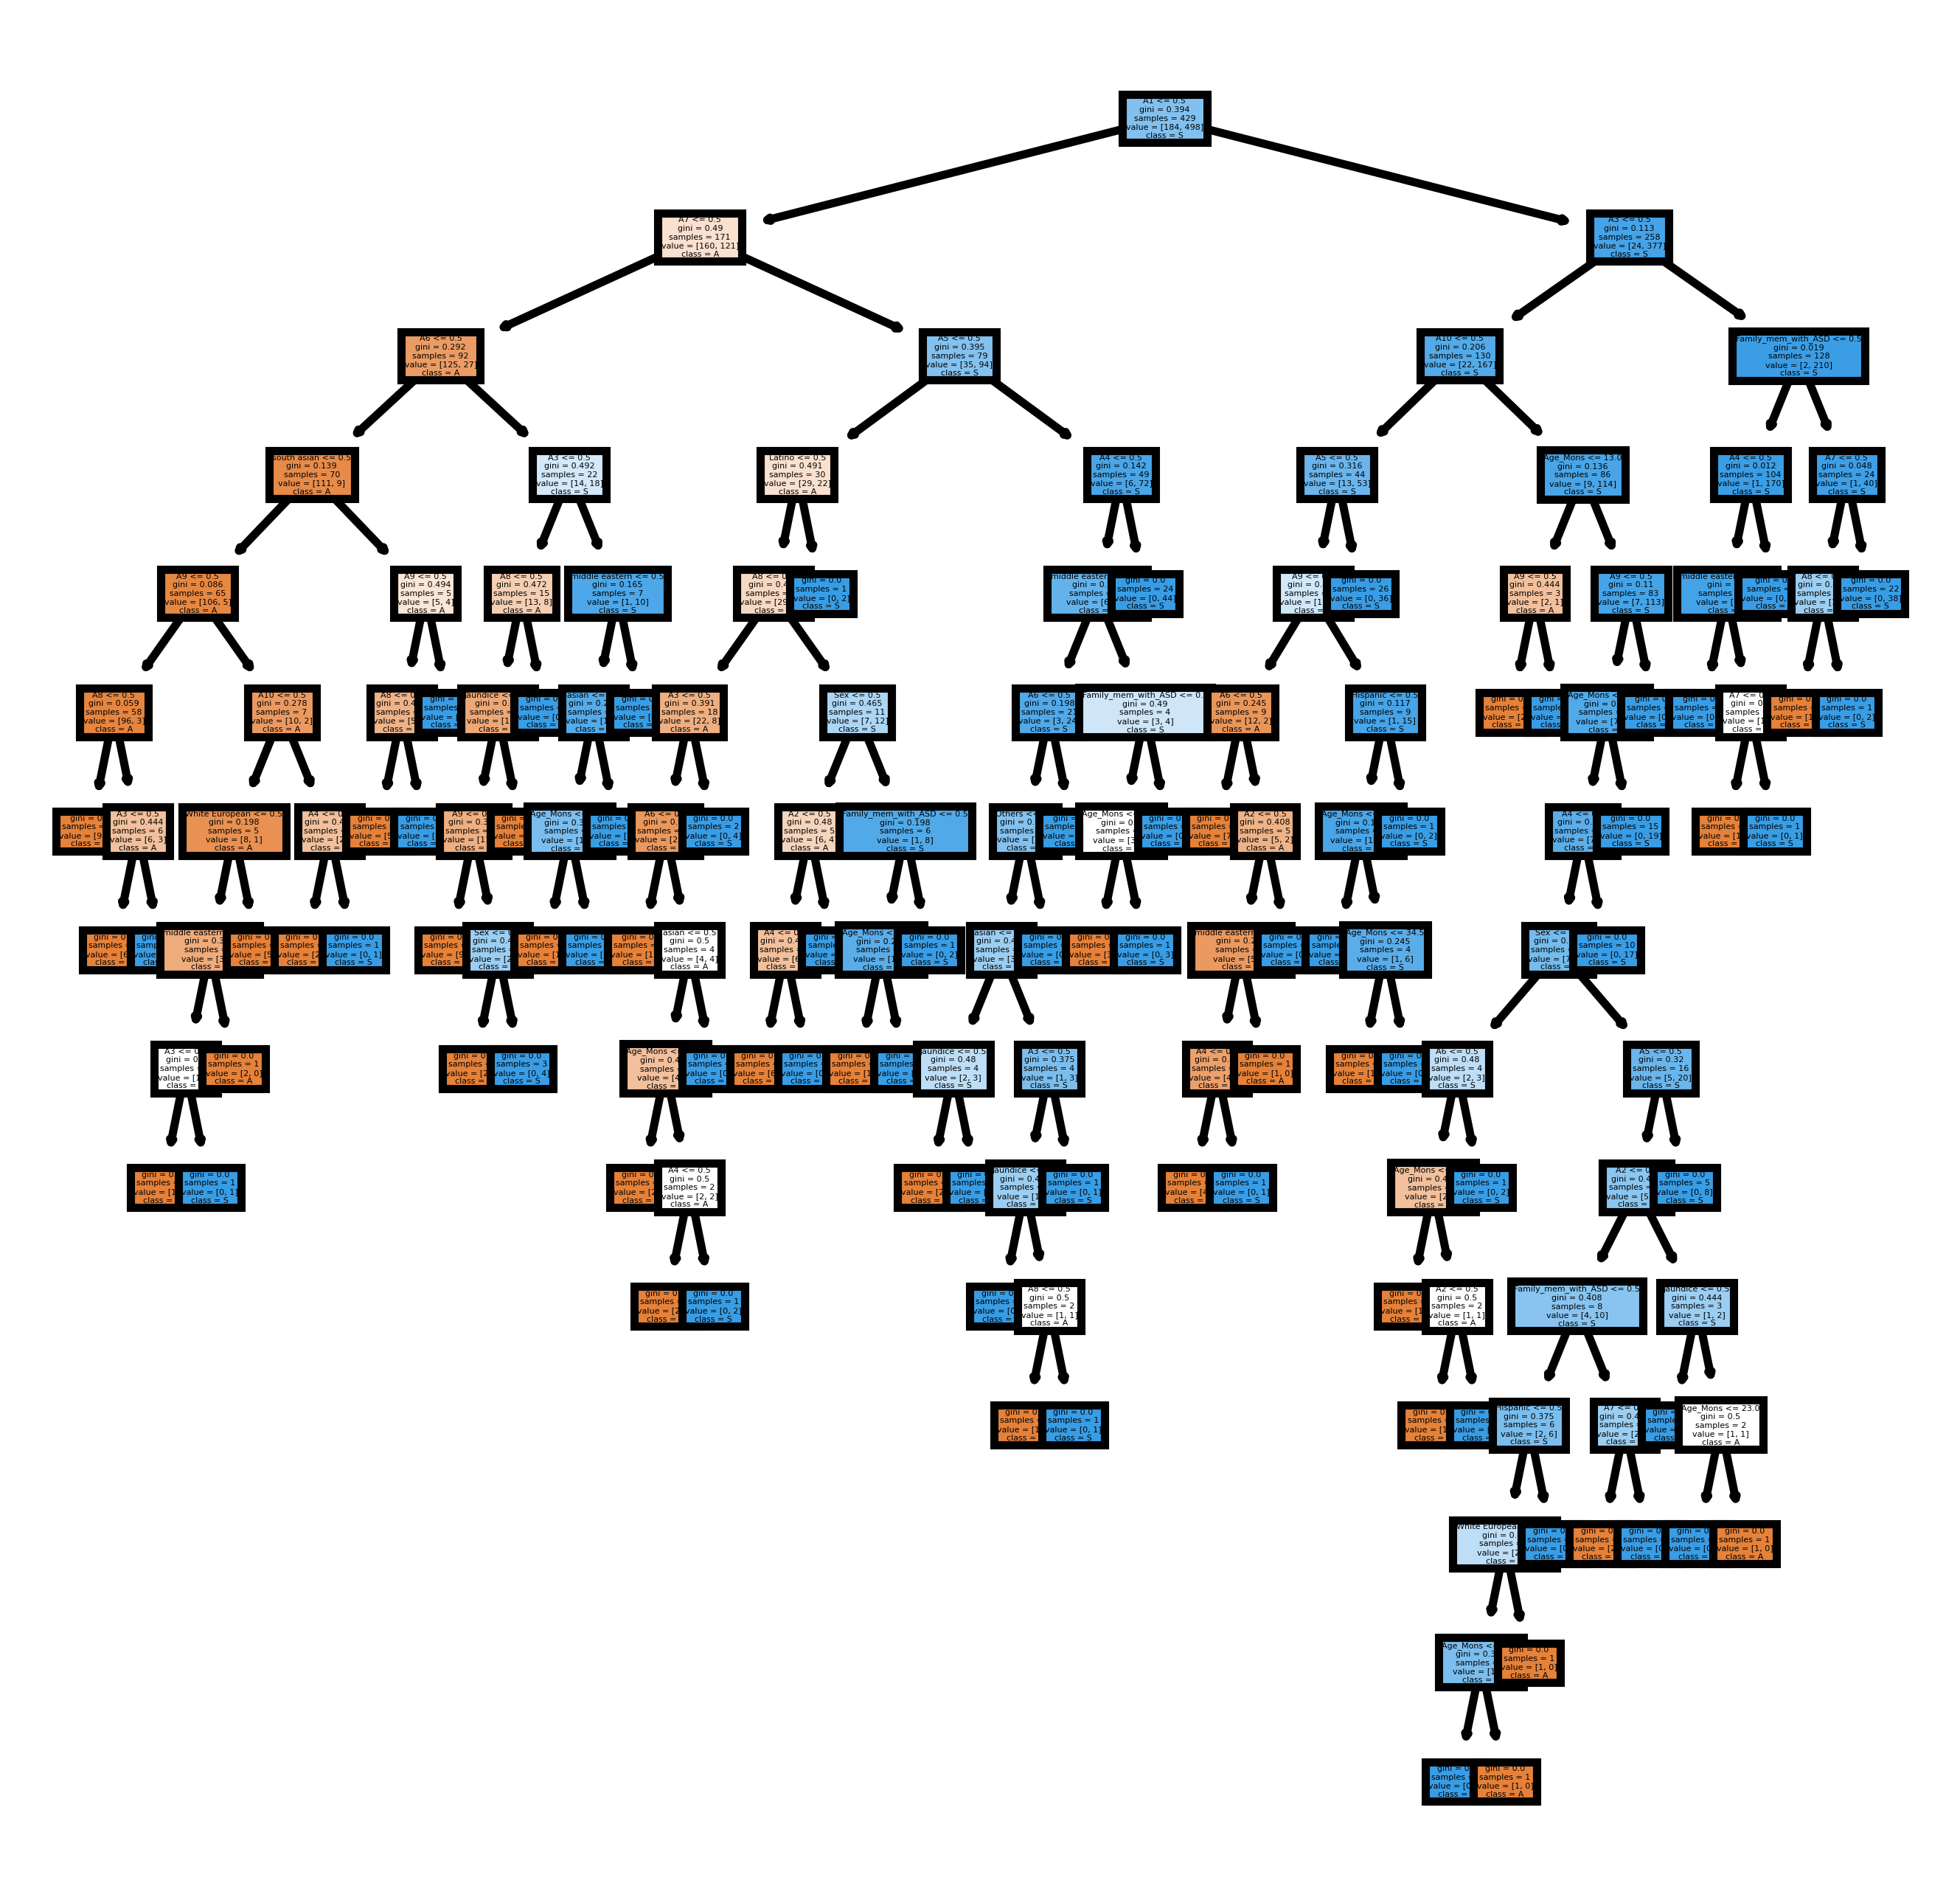

In [54]:
#final estimator
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=800)

tree.plot_tree(clf.estimators_[9],
               feature_names = X.columns, 
               class_names=y.name,
               filled = True);

In [55]:
#Accuracy
from sklearn import metrics

print('Accuracy Score:', metrics.accuracy_score(y_test, rfc_predict))
print('Confusion matrix:\n', metrics.confusion_matrix(y_test, rfc_predict))
print('F1 Score:', metrics.f1_score(y_test, rfc_predict))

Accuracy Score: 0.9488054607508533
Confusion matrix:
 [[ 84  10]
 [  5 194]]
F1 Score: 0.9627791563275433


### 4.2 Support Vector Machine (SVM)

In [59]:
from sklearn import svm

In [60]:
X = merged_df.drop('ASD', axis=1)
y = merged_df.ASD

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=66)

model = svm.SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)
svm_pred = model.predict(X_test)

In [61]:
print('Accuracy Score:', metrics.accuracy_score(y_test, svm_pred))
print('Confusion matrix:\n', metrics.confusion_matrix(y_test, svm_pred))
print('F1 Score:', metrics.f1_score(y_test, svm_pred))

Accuracy Score: 1.0
Confusion matrix:
 [[ 94   0]
 [  0 199]]
F1 Score: 1.0


### 4.3 Logistic Regression

In [63]:
#split dataset in features and target variable
X = merged_df.drop('ASD', axis=1)
y = merged_df.ASD

In [64]:
# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=66)

In [65]:
print("X shape: ", X.shape)
print("y shape: ", y.shape)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X shape:  (975, 25)
y shape:  (975,)
X_train shape:  (682, 25)
y_train shape:  (682,)
X_test shape:  (293, 25)
y_test shape:  (293,)


In [73]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=200)

# fit the model with data
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

In [74]:
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))
print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('F1 Score:', metrics.f1_score(y_test, y_pred))

Accuracy Score: 1.0
Confusion matrix:
 [[ 94   0]
 [  0 199]]
F1 Score: 1.0


Text(0.5, 257.44, 'ASD')

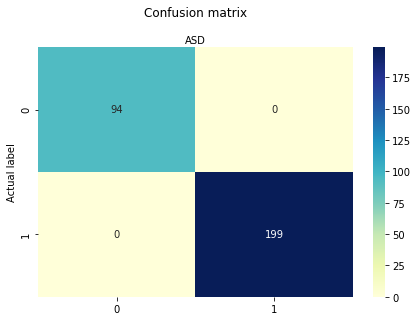

In [78]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('ASD')

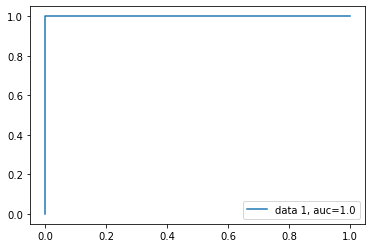

In [79]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<a id='conclusion'></a>
## 5. Conclusions

| ML Method           | Accuracy Score     | Confusion matrix      | F1 Score           |
| ---                 | ---                | ---                   | ---                |
| Random Forest       | 0.9488054607508533 | [[ 84  10],[  5 194]] | 0.9627791563275433 |
| SVM                 | 1.0                | [[ 94   0],[  0 199]] | 1.0                |
| Logistic Regression | 1.0                | [[ 94   0],[  0 199]] | 1.0                |

The best ML methods for this data set are SVM and Logistic regression.